In [ ]:
!pip install matplotlib
!pip install scipy

In [12]:
from scipy.optimize import fsolve
import math

def k(x0, x1, x2, A, D):
    return A*x0*x1*x2/(D/3)**3

def f(x0, x1, x2, A, D):
    k0 = k(x0, x1, x2, A, D)
    return x0*x1*x2 + k0*(x0+x1+x2)*(D**2) - (D/3)**3 - k0*D**3

def calc_D(x0, x1, x2, A, D0):
    def f_D(D, x0, x1, x2, A):
        return f(x0, x1, x2, A, D)
    return fsolve(f_D, D0, args=(x0, x1, x2, A))[0]

# calc y for x0
def calc_x0(x0, x1, x2, A, D):
    return fsolve(f, x0, args=(x1, x2, A, D))[0]

In [17]:
# Add liquidity
# balances
b0 = [100, 90, 110]
a = [300, 0, 0]
b1 = [b0[0] + a[0], b0[1] + a[1], b0[2] + a[2]]

A = 1
fee = 0.01

D0 = calc_D(b0[0], b0[1], b0[2], A, sum(b0) / 3)
D1 = calc_D(b1[0], b1[1], b1[2], A, D0)

# imbalance fees
i_bals = [D1 / D0 * b for b in b1]
diffs = [b - bi for (b, bi) in zip(b1, i_bals)]
fees = [abs(d) * fee for d in diffs]
b2 = [b - f for (b, f) in zip(b1, fees)]

D2 = calc_D(b2[0], b2[1], b2[2], A, D1)

print(diffs)
print(fees)
print(D0, D1, D2)

[-376.05791446736555, -84.61303075515724, -103.4159264785255]
[3.7605791446736556, 0.8461303075515724, 1.034159264785255]
299.8991189141142 581.8477119377197 576.3775010104971


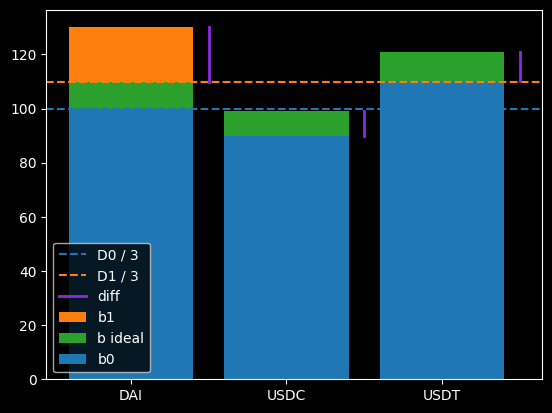

In [5]:
import matplotlib.pyplot as plt

# Doesn't work on GitHub
# plt.style.use('dark_background')

x = [0, 1, 2]

plt.bar(x, b1, color = "tab:orange", label = "b1")
plt.bar(x, b_ideal, color = "tab:green", label = "b ideal")
plt.bar(x, b0, color = "tab:blue", label = "b0")
plt.axhline(D0 / 3, ls = "--", label = "D0 / 3", color = "tab:blue")
plt.axhline(D1 / 3, ls = "--", label = "D1 / 3", color = "tab:orange")

for i in x:
    label = "diff" if i == 0 else None
    plt.plot([i + 0.5, i + 0.5], [b_ideal[i], b_ideal[i] + diff[i]], color = 'blueviolet', linestyle = '-', linewidth = 2, label = label)

plt.xticks([0, 1, 2], ["DAI", "USDC", "USDT"])
plt.legend()
plt.show()

In [6]:
# Remove liquidity one coin
# balances
b0 = [100, 90, 110]

A = 1
# Initial guess to find D0
D0 = sum(b0) / 3

D0 = calc_D(b0[0], b0[1], b0[2], A, D0)
D1 = 0.8 * D0

b1 = [b for b in b0]
b1[0] = calc_x0(b0[0], b0[1], b0[2], A, D1)

b_ideal = [D1 / D0 * b for b in b0]
diff = [b - bi for (b, bi) in zip(b1, b_ideal)]

diff

[-38.02847166646812, 18.0, 22.0]

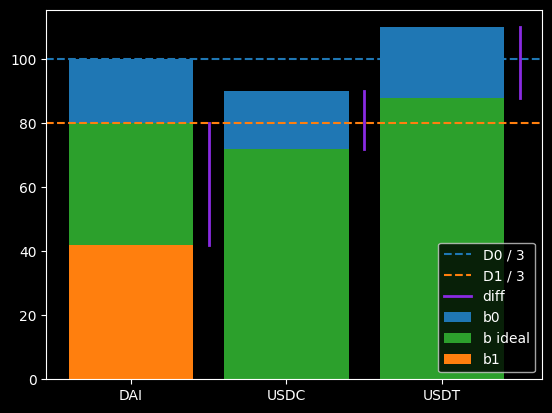

In [7]:
import matplotlib.pyplot as plt

# Doesn't work on GitHub
# plt.style.use('dark_background')

x = [0, 1, 2]

plt.bar(x, b0, color = "tab:blue", label = "b0")
plt.bar(x, b_ideal, color = "tab:green", label = "b ideal")
# Only withdrawing x0 so b1[i] = b0[i] for i = 1, 2
plt.bar([0], [b1[0]], color = "tab:orange", label = "b1")

plt.axhline(D0 / 3, ls = "--", label = "D0 / 3", color = "tab:blue")
plt.axhline(D1 / 3, ls = "--", label = "D1 / 3", color = "tab:orange")

for i in x:
    label = "diff" if i == 0 else None
    plt.plot([i + 0.5, i + 0.5], [b_ideal[i], b_ideal[i] + diff[i]], color = 'blueviolet', linestyle = '-', linewidth = 2, label = label)

plt.xticks([0, 1, 2], ["DAI", "USDC", "USDT"])
plt.legend()
plt.show()